<a href="https://colab.research.google.com/github/AG-2478/Just_For_Fun/blob/feature1/WhatsappTextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji
!pip install heatmap
!pip install stop-words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=686309e5acb1b97aed3283e4321d2ce63e4e2440472f0929950722c1f98c884d
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
from regex import regex
import emoji
from seaborn import *
#from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [ ]:
def startsWithDate(x):

  pattern = '([)([0-9]+)(\/)([0-9]+)(\/)([0-9]+),( )([0-9]+):([0-9]+):([0-9]+)( )(AM|PM)(])'
  result = re.match(pattern, x)
  if result:
      return True
  return False

In [ ]:
def startsWithAuthor(s):
  s = s.split(': ')
  if len(s)==2:
      return True
  return False

In [ ]:
def getDataPoint(line):
  splitLine = line.split(']')
  dateTime = splitLine[0]
  date, time = dateTime.split(', ')
  message = ' '.join(splitLine[1:])
  if startsWithAuthor(message):
      splitMessage = message.split(': ')
      author = splitMessage[0]
      message = ' '.join(splitMessage[1:])
  else:
      author = None
  return date, time, author, message

In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = '/content/drive/MyDrive/Datasets/chat.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        line = line.replace("\u200e", "")
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df['Date'] = df['Date'].str[1:]
#df["Date"] = pd.to_datetime(df["Date"])
chat = df
df.head(93)

In [ ]:
def name_replace(oldname,newname):
  df['Author'] = df.Author.str.replace(oldname,newname)
  return df

df = name_replace('Rama', 'Rams')
df = name_replace('Chitti', 'Buns')
df = name_replace('Vamsi', 'Mads')
df = name_replace('Kallu Ws', 'Kals')
df = name_replace('Anand', 'Guns')
df

###**1.Overall Statistics**

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)
    return emoji_list

total_messages = df.shape[0]
media_messages = df[df['Message'] =='image omitted'].shape[0]
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Group Wise Stats")
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)
df.info

In [ ]:
media_messages_df = df[df['Message'] == 'image omitted']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count
0,6/16/20,9:53:09 PM,Guns,I need freedom to post anything,[],0,31,6
1,6/16/20,9:53:22 PM,Rams,😂😂😂😂😂,"[😂, 😂, 😂, 😂, 😂]",0,5,1
2,6/16/20,9:53:26 PM,Rams,Saripoyindi,[],0,11,1
3,6/16/20,9:53:30 PM,Rams,Kaani kaani,[],0,11,2
4,6/16/20,9:53:32 PM,Rams,Pilla,[],0,5,1
...,...,...,...,...,...,...,...,...
8421,5/23/21,8:43:13 PM,Kals,Meru night matladukunnaru,[],0,25,3
8422,5/23/21,8:54:03 PM,Mads,https://www.instagram.com/reel/COKZA7JgAW8/?ut...,[],1,66,1
8423,5/23/21,8:54:14 PM,Mads,sticker omitted,[],0,15,2
8424,5/23/21,8:54:17 PM,Mads,Mrng kuda,[],0,9,2


###**Author-wise Stats**

In [ ]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)
  print()


Stats of  Guns -
Messages Sent 1826
Words per message 4.586527929901424
Media Messages Sent 204
Emojis Sent 411
Links Sent 69

Stats of  Rams -
Messages Sent 2031
Words per message 3.5548990645002463
Media Messages Sent 60
Emojis Sent 2093
Links Sent 46

Stats of  Buns -
Messages Sent 1650
Words per message 2.8642424242424243
Media Messages Sent 76
Emojis Sent 1093
Links Sent 72

Stats of  Kals -
Messages Sent 502
Words per message 3.5199203187250996
Media Messages Sent 66
Emojis Sent 285
Links Sent 23

Stats of  Mads -
Messages Sent 1852
Words per message 4.3725701943844495
Media Messages Sent 146
Emojis Sent 463
Links Sent 79

Stats of None -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

invalid value encountered in long_scalars



###**Most used Emoji in Group**


In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df


,emoji,count
0,😂,1318
1,😒,556
2,🤣,546
3,🙄,373
4,😅,137
...,...,...
148,😈,1
149,💆🏻‍♀️,1
150,💁,1
151,🤷‍♀️,1


In [ ]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for',l[i],'with',len(emoji_dict),'different emojis' )
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for  Guns with 73 different emojis


Emoji Distribution for  Rams with 68 different emojis


Emoji Distribution for  Buns with 35 different emojis


Emoji Distribution for  Kals with 51 different emojis


Emoji Distribution for  Mads with 50 different emojis


Emoji Distribution for None with 0 different emojis


In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
# OUTPUT -
# There are 687467 words in all the messages.

There are 195632 words in all the messages.


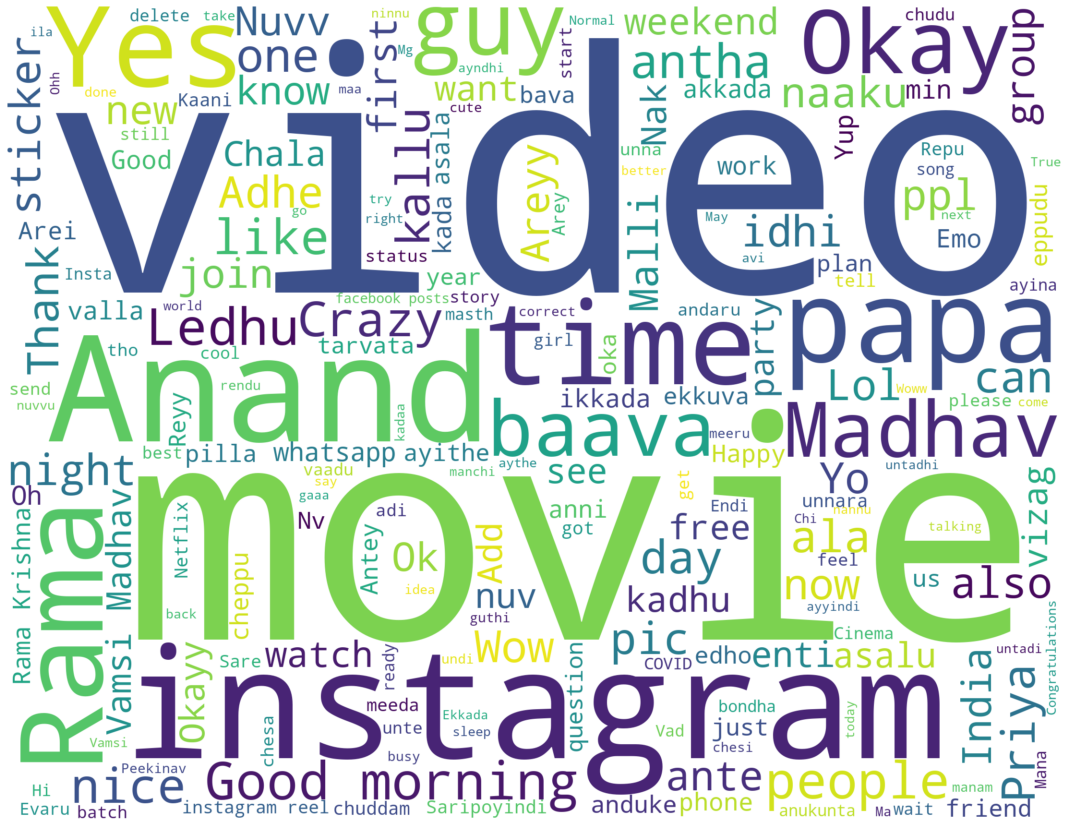

In [ ]:
from stop_words import get_stop_words

stopwords = get_stop_words('en')

#stopwords = stopwords.words('english')
#stopwords = set(STOPWORDS)
stopwords.extend(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le",'raa','raaa','omitted','lo','ga','www','https','leyy',
                  '.com','com','aa','aaa','Nee','GIF','igshid','Nenu','ee','ni','kuda','message','deleted','ga','ae','ni','ga','Ye','Nu','gaa','youtu'
                  ,'kadha','undhi','Adhi','call','Yea','ippudu','neeku','Enduku','mari','anta','Nen','asal','Nen','inka','naa','ayitey','lu','anthe',
                  'ela','Nduku','will'])


#stopwords = set(all_stopwords)
#stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le"])
# Generate a word cloud image
#wordcloud = WordCloud(background_color="white").generate(text)
wordcloud = WordCloud(width = 2200, height = 1700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 14).generate(text)
# Display the generated image:
# the matplotlib way:
wordcloud

plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#from matplotlib.dates import DateFormatter
#messages_df
date_df = messages_df.groupby(["Date", "Author"]).sum()
date_df

urlcount  Letter_Count  Word_Count
Date    Author                                    
1/13/21  Guns          0            23           2
         Kals          0            11           2
         Mads          0            23           2
         Rams          0            23           3
1/14/21  Buns          0            18           3
...                  ...           ...         ...
9/8/20   Kals          1            28           1
9/9/20   Guns          0           158          29
         Kals          1            61           1
         Mads          0            17           2
         Rams          0           105          14

[1022 rows x 3 columns]

In [ ]:
def split_count_len(data):
  emoji_list = []
  for word in data:
      if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
          emoji_list.append(word)
  return len(emoji_list)


messages_df['emoji_count']=''
messages_df['emoji_count'] = messages_df['emoji'].apply(split_count_len)
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,emoji_count
0,6/16/20,9:53:09 PM,Guns,I need freedom to post anything,[],0,31,6,0
1,6/16/20,9:53:22 PM,Rams,😂😂😂😂😂,"[😂, 😂, 😂, 😂, 😂]",0,5,1,5
2,6/16/20,9:53:26 PM,Rams,Saripoyindi,[],0,11,1,0
3,6/16/20,9:53:30 PM,Rams,Kaani kaani,[],0,11,2,0
4,6/16/20,9:53:32 PM,Rams,Pilla,[],0,5,1,0
...,...,...,...,...,...,...,...,...,...
8421,5/23/21,8:43:13 PM,Kals,Meru night matladukunnaru,[],0,25,3,0
8422,5/23/21,8:54:03 PM,Mads,https://www.instagram.com/reel/COKZA7JgAW8/?ut...,[],1,66,1,0
8423,5/23/21,8:54:14 PM,Mads,sticker omitted,[],0,15,2,0
8424,5/23/21,8:54:17 PM,Mads,Mrng kuda,[],0,9,2,0


###**Word Cloud & Text Mining**

In [ ]:
from stop_words import get_stop_words
def individual_Wordcloud(individualtext):
  stopwords = get_stop_words('en')
  stopwords.extend([',',' ','','(', 'I','just', 'And','give', 'rock', ')','Arjuna', 'Arjuna,','took','Meeting', 'asked','right','tools','Krishna', 'mountain','team','Zoom','break','mountain.','deleted', 'deleted.', 'This', 'the', 'to', 'will', "ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le",'raa','raaa','omitted','lo','ga','www','https','leyy',
                    '.com','com','aa','aaa','Nee','GIF','igshid','Nenu','ee','ni','kuda','message','deleted','ga','ae','ni','ga','Ye','Nu','gaa','youtu'
                    ,'kadha','undhi','Adhi','.','➙', '-','◉','pH','call','Yea','He', 'used', 'credit','people', 'several','ippudu','neeku','Enduku','mari','anta','Nen','asal','Nen','inka','naa','ayitey','lu','anthe',
                    'ela','Nduku','__________','It','Burning', 'Loss','smell','taste','throat','pain','health','•'])
  wordcloud = WordCloud(width = 2200, height = 1700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 14).generate(individualtext)
  plt.figure( figsize=(20,15))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  return

In [ ]:
from collections import Counter
from itertools import combinations
def word_mining(df):
  count = Counter()
  stopwords = get_stop_words('en')
  stopwords.extend([',',' ','','(', 'I','just', 'And','give', 'rock', ')','Arjuna', 'Arjuna,','took','Meeting', 'asked','right','tools','Krishna', 'mountain','team','Zoom','break','mountain.','deleted', 'deleted.', 'This', 'the', 'to', 'will', "ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le",'raa','raaa','omitted','lo','ga','www','https','leyy',
                      '.com','com','aa','aaa','Nee','GIF','igshid','Nenu','ee','ni','kuda','message','deleted','ga','ae','ni','ga','Ye','Nu','gaa','youtu'
                      ,'kadha','undhi','Adhi','.','➙', '-','◉','pH','call','Yea','He', 'used', 'credit','people', 'several','ippudu','neeku','Enduku','mari','anta','Nen','asal','Nen','inka','naa','ayitey','lu','anthe',
                      'ela','Nduku','__________','It','Burning', 'Loss','smell','taste','throat','pain','health','•'])

  for row in df['Message']:
    row_list = row.split(' ')
    for word in list(row_list):  # iterating on a copy since removing will mess things up
      if word in stopwords:
          row_list.remove(word)
    count.update(Counter(combinations(row_list,2)))

  for items, freq in count.most_common(10):
    b=set()
    result=[element for element in items
      if not (tuple(element) in b
        or  b.add(tuple(element)))]

    print(str(result), freq)
  return result

I need freedom to post anything To cope up from Quarantine Nen cheseve avi I was reading about Enrique Iglesias in quora He's modest and bold to say that He told to this in an Australian TV interview Wow asala Manam India lo discuss chesukovatle Adi anthe.. 😂 sexy There is no green 😂 ✋🏼 +1 😁 Okay adult guy Is it going on people? Pikachuu Call ettaniki em noppi @14698599933 Enjoy the 🌞 rise Party party partyy Hi I'm watching LIE It's a nice movie I'll come in 5 mins? I'm installing Wait What's happening? I can't talk now You 3 aren't rolling the 🎲. So I quit So who's the second Arey in US do you think they saw grahanam ra? How's the night out party @14698599933 :p they see the moon We got party freaks to tell here because we do haven't been to parties 😂 Kaushal Manda ni burra takkuvedhava antnara Vaadu big boss winner 😁 Arey what ra you people taking Lol Kannam lo Kacheri No Ooty videos, only pics And this is not Ooty Yes bitches these are the pictures We are adult subset ra Meme చెయ్యొ

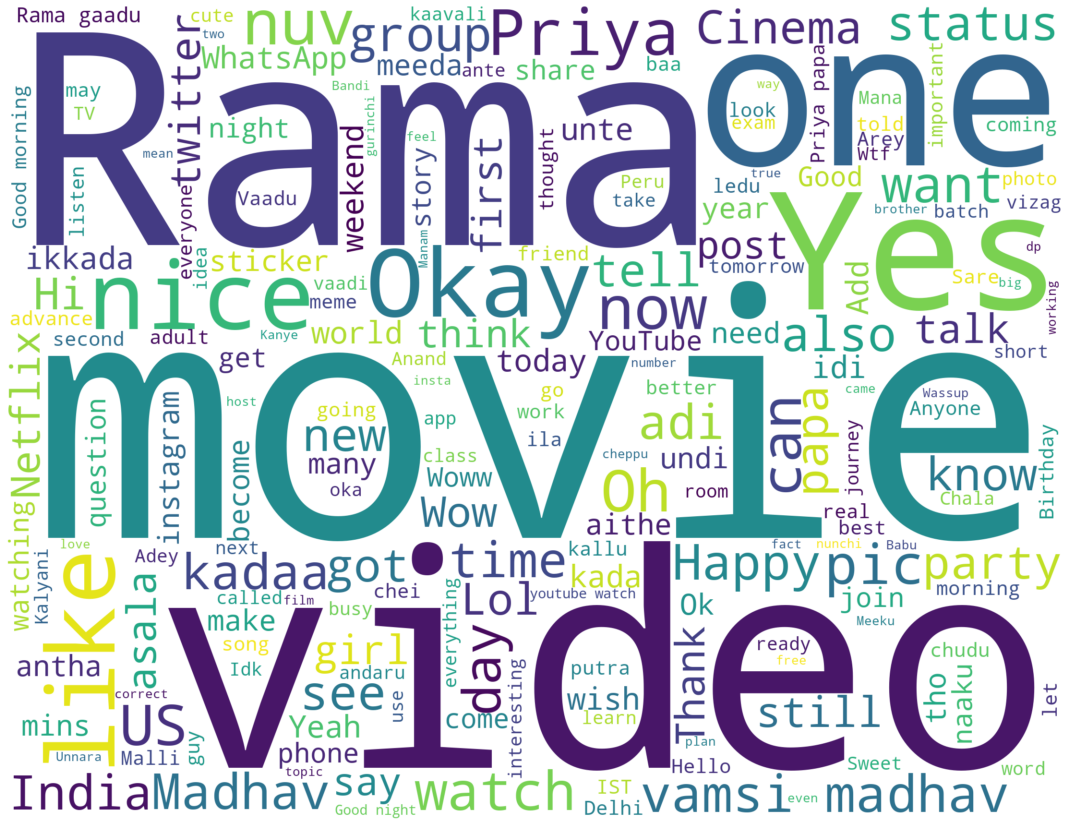

Most frequent words used by  Guns


TypeError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#def author_input(messages_df):
messages_df = messages_df.dropna()
dff = messages_df
p = dff.Author.unique()
for i in range(len(p)):
  temp_df = dff[dff['Author'] == p[i]]
  #print(temp_df)
  indiv_author_messages = " ".join(review for review in temp_df.Message)
  print(indiv_author_messages)
  print('\nWord cloud for', p[i])
  y = individual_Wordcloud(indiv_author_messages)
  print('Most frequent words used by', p[i])
  word_mine = word_mining(temp_df)


#return y, word_mine

#author_input(messages_df)





In [ ]:
z = " ".join(review for review in messages_df.Message)
z


  #Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
  tfidf = TfidfVectorizer(stop_words='english')

  #Replace NaN with an empty string
  temp_df['Message'] = temp_df['Message'].fillna('')

  #Construct the required TF-IDF matrix by fitting and transforming the data
  tfidf_matrix = tfidf.fit_transform(temp_df['Message'])

  #Output the shape of tfidf_matrix
  tfidf_matrix.shape

  #Array mapping from feature integer indices to feature name.
  tfidf.get_feature_names()[1:6]

In [ ]:
date_df=messages_df


date_df['hour']  = pd.DatetimeIndex(messages_df['Date']).hour
date_df['day']  = pd.DatetimeIndex(messages_df['Date']).day
date_df['month']  = pd.DatetimeIndex(messages_df['Date']).month
date_df['year']  = pd.DatetimeIndex(messages_df['Date']).year
date_df['week'] = pd.DatetimeIndex(messages_df['Date']).weekday #0 - monday, 6-sunday

date_df = messages_df.sort_values(by=["year",'month','day'],ascending=True)

fig = px.bar(date_df, x="week",y='Letter_Count', title='Number of Messages as time moves on.')
#fig.update_xaxes(nticks=200)
#date_form = DateFormatter("%m-%Y")
#ax.xaxis.set_major_formatter(date_form)

fig.show()

date_df

In [ ]:

date_df = messages_df.groupby(["Date","Author"]).sum()
date_df.reset_index(inplace=True)
print(date_df)

#fig = plt.subplots(figsize=(20, 12))



In [ ]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,6000]
    )),
  showlegend=False
)
fig.show()

###**.Message Frequency**

In [ ]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
author_value_counts.plot.barh()

###**Practice Codes**

In [ ]:
conversationPath = '/content/drive/MyDrive/Datasets/chat.txt' # chat file
x = open(conversationPath, encoding="utf-8")
y = x.readlines(10000) # Skipping first line of the file because contains information related to something about end-to-end encryption
y = y[90:91]
word2=''
for word in y:
  word2 = word+word2
print(word2)
line = word2

def startsWithAuthor(s):
  s = s.split(': ')
  if len(s)==2:
      return True
  return False

if startsWithAuthor(message):
    splitMessage = message.split(':')
    print('sm', splitMessage)
    author = splitMessage[0]
    print('au:', author)
    message = ' '.join(splitMessage[1:])
    print('me:', message)
else:
    author = None

splitLine = line.split(']')
dateTime = splitLine[0]
date, time = dateTime.split(', ')
message = ' '.join(splitLine[1:])
print(message)
splitMessage = message.split(': ')
print('sm:', splitMessage)
len(splitMessage)


In [ ]:
def individual_Wordcloud(individualtext):
  #messages_df = messages_df.dropna()
  #print(messages_df)
  #x = messages_df[messages_df['Author'].str.contains(author)]
  #print(x)
  #individualtext = " ".join(review for review in x.Message)
  from stop_words import get_stop_words

  stopwords = get_stop_words('en')

  #stopwords = stopwords.words('english')
  #stopwords = set(STOPWORDS)
  stopwords.extend([',',' ','','(', 'I','just', 'And','give', 'rock', ')','Arjuna', 'Arjuna,','took','Meeting', 'asked','right','tools','Krishna', 'mountain','team','Zoom','break','mountain.','deleted', 'deleted.', 'This', 'the', 'to', 'will', "ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le",'raa','raaa','omitted','lo','ga','www','https','leyy',
                    '.com','com','aa','aaa','Nee','GIF','igshid','Nenu','ee','ni','kuda','message','deleted','ga','ae','ni','ga','Ye','Nu','gaa','youtu'
                    ,'kadha','undhi','Adhi','.','➙', '-','◉','pH','call','Yea','He', 'used', 'credit','people', 'several','ippudu','neeku','Enduku','mari','anta','Nen','asal','Nen','inka','naa','ayitey','lu','anthe',
                    'ela','Nduku','__________','It','Burning', 'Loss','smell','taste','throat','pain','health','•'])


  #stopwords = set(all_stopwords)
  #stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le"])
  # Generate a word cloud image
  #wordcloud = WordCloud(background_color="white").generate(text)
  wordcloud = WordCloud(width = 2200, height = 1700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 14).generate(individualtext)
  # Display the generated image:
  # the matplotlib way:
  wordcloud

  plt.figure( figsize=(20,15))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  return

# New Section